## Outlier Detection and Removal Using Z Score

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"Datasets/Height_New.csv")

In [4]:
data.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [6]:
data.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


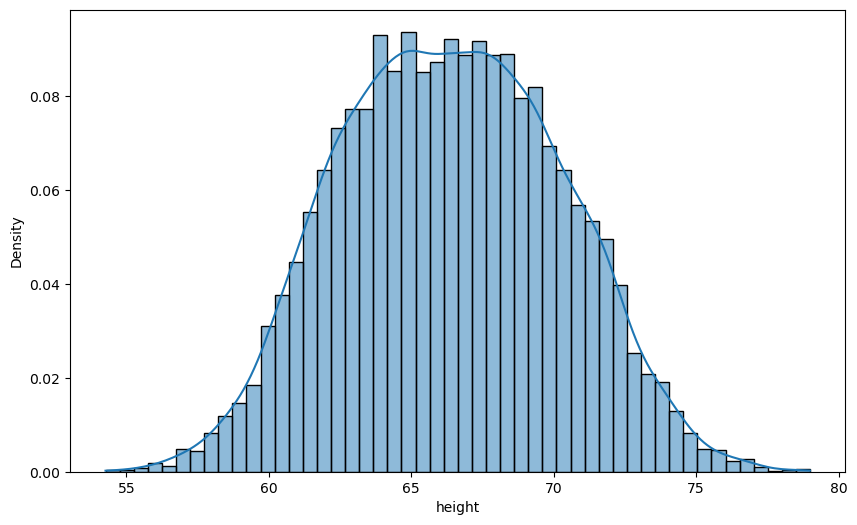

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data['height'],kde=True, bins= 50, stat= "density")
plt.show()

In [17]:
data.height.mean()

66.367559754866

In [18]:
data.height.std()

3.847528120795573

## Outlier removal using 3 STD

In [21]:
Max_Outlier = data.height.mean() + 3 * data.height.std()
Max_Outlier

77.91014411725271

In [25]:
Min_Outlier = data.height.mean() - 3 * data.height.std()
Min_Outlier

54.824975392479274

In [27]:
New_data = data[(data['height']<Max_Outlier) & (data['height']>Min_Outlier)]

In [28]:
New_data.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


## Z Score

#### Z Score =  ( Target Value - Mean ) / Standard Deviation

In [29]:
data.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [31]:
data['zscore'] = (data.height - data['height'].mean() ) / data['height'].std()

In [32]:
data.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [33]:
data.height.mean()

66.367559754866

In [34]:
data.height.std()

3.847528120795573

In [36]:
Z_Score =  ( 73.847017 - 66.367559754866 ) / 3.847528120795573
Z_Score

1.9439642831219734

In [37]:
data[data['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [38]:
data[data['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [39]:
data[(data['zscore']>3) | (data['zscore']<-3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [41]:
Outlier_Free_data = data[(data['zscore']<3) & (data['zscore']>-3)]

In [42]:
Outlier_Free_data

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


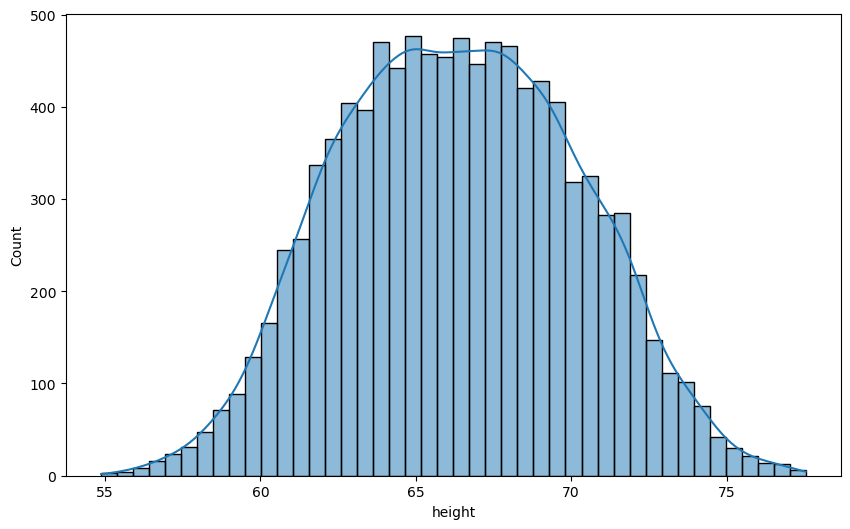

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(Outlier_Free_data['height'], kde= True )
plt.show()